In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler # for scaling the data
from tensorflow.keras.models import Sequential # for creating a linear stack of layers for the Neural Network
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [46]:
dataset = pd.read_csv("./TSLA.csv")
dataset[0:3]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800


In [47]:
# spliting data to training and test sets
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)
train_data=dataset[0:training_data_len]

1933


In [72]:
# scaling the training data
sc = MinMaxScaler(feature_range=(0,1))
# creating a new dataframe with only 'Open column and scaling it
scaled_data = sc.fit_transform(dataset['Open'].values.reshape(-1,1))
print(scaled_data)

[[0.00434948]
 [0.01467569]
 [0.01347426]
 ...
 [0.93723668]
 [0.94876435]
 [1.        ]]


In [73]:
prediction_days = 100
x_train = [] # independent training features (input)
y_train = [] # target variables (benchmark)

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])
    if i <= prediction_days:
        print(x_train)
        print(y_train)
        print()
# converting to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# getting the number of rows and columns in the sets
print(x_train.shape)
print(y_train.shape)

[array([0.00434948, 0.01467569, 0.01347426, 0.01043267, 0.00587028,
       0.00039541, 0.        , 0.00218995, 0.00275265, 0.001901  ,
       0.00273744, 0.00577903, 0.00693484, 0.00795377, 0.00868375,
       0.006874  , 0.00663068, 0.00768003, 0.00815147, 0.0072542 ,
       0.00670671, 0.00704129, 0.00617444, 0.00663068, 0.00739107,
       0.00883583, 0.00821231, 0.00602236, 0.0057182 , 0.005338  ,
       0.00387804, 0.00252452, 0.00310243, 0.00351304, 0.00428865,
       0.00524675, 0.00364992, 0.0038172 , 0.00448635, 0.00472968,
       0.00459281, 0.00570299, 0.00549008, 0.00541404, 0.00535321,
       0.00529238, 0.00643297, 0.00719337, 0.00679797, 0.006874  ,
       0.00739107, 0.00701088, 0.00722379, 0.00669151, 0.00736066,
       0.00913999, 0.00742149, 0.00688921, 0.00722379, 0.00719337,
       0.00570299, 0.00579424, 0.0064786 , 0.00745191, 0.00768003,
       0.00891187, 0.00691963, 0.00652422, 0.00761919, 0.00748232,
       0.00673713, 0.00652422, 0.00653943, 0.00617444, 0.0068

In [74]:
# reshaping the data (number of samples, number of timesteps, number of features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(2316, 100, 1)


In [75]:
# building the LSTM model
model = Sequential()
# 50 neurons, will use another LSTM layer, number of timesteps, number of features
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [76]:
model.summary()
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_20 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_21 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_22 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

In [77]:
model.fit(x_train, y_train, epochs=20, batch_size = 32)

Epoch 1/20
73/73 [==============================] - 8s 80ms/step - loss: 0.0091
Epoch 2/20
73/73 [==============================] - 6s 79ms/step - loss: 0.0024
Epoch 3/20
73/73 [==============================] - 6s 83ms/step - loss: 0.0022
Epoch 4/20
73/73 [==============================] - 5s 74ms/step - loss: 0.0018
Epoch 5/20
73/73 [==============================] - 5s 74ms/step - loss: 0.0018
Epoch 6/20
73/73 [==============================] - 6s 78ms/step - loss: 0.0017
Epoch 7/20
73/73 [==============================] - 6s 76ms/step - loss: 0.0020
Epoch 8/20
73/73 [==============================] - 6s 79ms/step - loss: 0.0015
Epoch 9/20
73/73 [==============================] - 5s 74ms/step - loss: 0.0015
Epoch 10/20
73/73 [==============================] - 5s 75ms/step - loss: 0.0013
Epoch 11/20
73/73 [==============================] - 6s 80ms/step - loss: 0.0013
Epoch 12/20
73/73 [==============================] - 6s 79ms/step - loss: 0.0012
Epoch 13/20
73/73 [==================

In [102]:
# creating testing data set
test_data = scaled_data[training_data_len - prediction_days: , :]
# creating the data sets x_test and y_test
x_test = []
y_test = dataset.values[training_data_len:, 1] # all of the values for the model to predict (test values)
y_test = np.reshape(y_test, (y_test.shape[0], 1))

for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])
# converting to numpy array for LSTM
x_test = np.array(x_test)
# reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test.shape)
print(y_test.shape)

(483, 100, 1)


In [99]:
# getting the models predicted price values
predicted_prices = model.predict(x_test)
# get the real (unscaled) values
predicted_prices = sc.inverse_transform(predicted_prices)

16/16 [==============================] - 1s 48ms/step


In [108]:
# getting the root mean squared error (RMSE) for evaluation of the model
rmse = np.sqrt(np.mean(((predicted_prices- y_test) ** 2)))
rmse

25.679100576929365

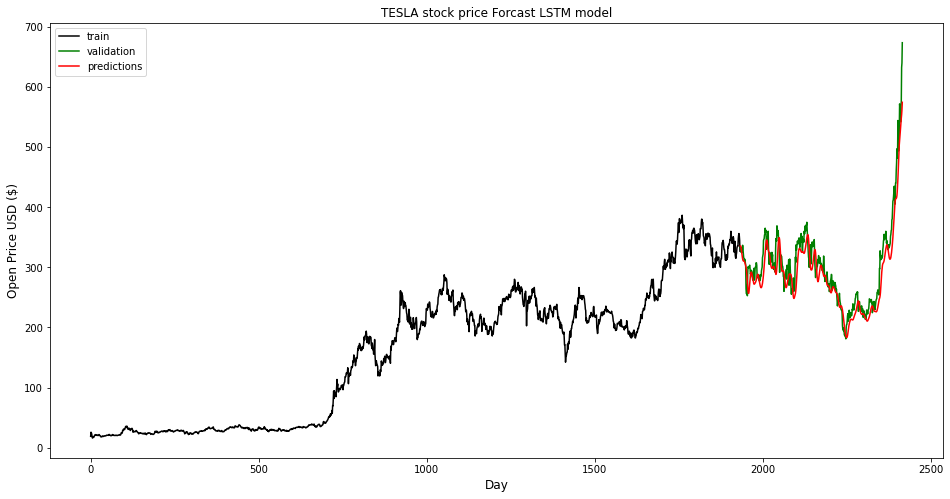

In [126]:
# removing the pandas warning on copy of a slice which is immaterial in this case
pd.options.mode.chained_assignment = None # default='warn'
# plotting the data
train = dataset[:training_data_len]
valid = dataset[training_data_len:]
valid['Predictions'] = predicted_prices
# visualizing the data
plt.figure(figsize=(16, 8))
plt.title(f"TESLA stock price Forcast LSTM model")
plt.xlabel("Day", fontsize=12)
plt.ylabel(f"Open Price USD ($)", fontsize=12)


plt.plot(train['Open'], color='black', label=f"train")
plt.plot(valid['Open'], color='green', label=f"validation")
plt.plot(valid['Predictions'], color='red', label=f"predictions")

plt.legend()
plt.show()

In [125]:
# showing the valid and predicted prices
valid[['Open', 'Predictions']]

,Open,Predictions
1933,332.390015,335.445618
1934,333.750000,335.767242
1935,325.440002,333.944489
1936,332.859985,330.407074
1937,324.100006,326.038605
...,...,...
2411,568.489990,541.077454
2412,575.690002,548.015442
2413,632.419983,553.837524
2414,640.000000,561.934143
